In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
df['target'] = iris.target
df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
50       1  
51       1  
52       1  
53       1  
54       1

In [8]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

'''def get_flower_name(x):
    return iris.target_names[x]

df['flower_name'] = df.target.apply(get_flower_name)'''
#The apply function is used in pandas to apply a function along an axis of the DataFrame (rows or columns).
#In this case, it is used to apply a function to each element in the target column.

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [11]:
import matplotlib.pyplot as plt

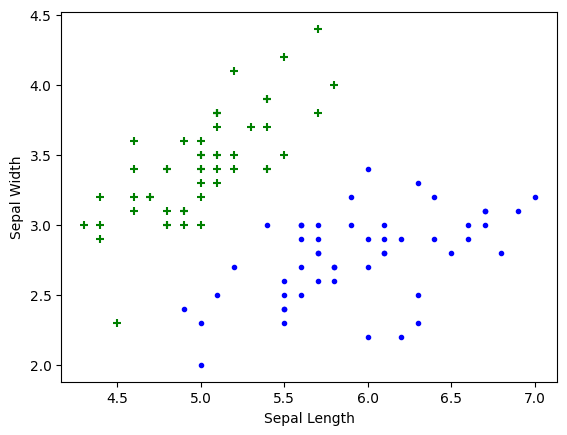

In [12]:
#Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

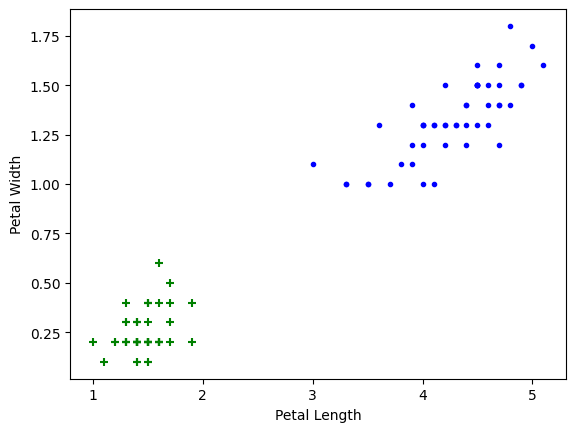

In [13]:
#Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [ ]:
#Train Using Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)


120

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernels= ['linear','poly','rbf'] #rbf==radial basis function
for kernel in kernels:
  model= SVC(kernel=kernel)
  model.fit(X,y)
  pred = model.predict(X_test)
  print("Accuracy using {}:".format(kernel), accuracy_score(pred,y_test))

  '''An SVM model is created with the specified kernel.
The model is trained using the training data (X_train, y_train).
Predictions are made on the test data (X_test).
The accuracy of the model is calculated using accuracy_score(pred, y_test) and printed.'''

Accuracy using linear: 1.0
Accuracy using poly: 1.0
Accuracy using rbf: 1.0


In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

'''# Define the new sample with the same feature names
new_sample = pd.DataFrame([[4.8, 3.0, 1.5, 0.3]], columns=X.columns)

# Make the prediction
prediction = model.predict(new_sample)
print(prediction)'''

'''# Map the numerical prediction to the flower name
flower_name = iris.target_names[prediction[0]]
print("Predicted flower name:", flower_name)'''

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])